# Surface visualization

## Set the enviroment

In [1]:
# python notebook
#
# Tutorial 2 - Surface visualization
# micapipe v0.2.3
#
# Created by RRC on September 2021 (the second year of the pandemic)
# Updated by AN on November 2023 (COVID IS OVER)
# Updated on January 2024 (A NEW HOPE)

# Set the environment
import os
import glob
import numpy as np
import nibabel as nib
import seaborn as sns
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69

# Set the working directory to the 'out' directory
out='/data_/mica3/BIDS_MICs/derivatives' # <<<<<<<<<<<< CHANGE THIS PATH
os.chdir(out) 

# This variable will be different for each subject
sub='sub-HC001'
ses='ses-01'
subjectID=f'{sub}_{ses}'           # <<<<<<<<<<<< CHANGE THIS SUBJECT's ID
subjectDir=f'micapipe_v0.2.0/{sub}/{ses}' # <<<<<<<<<<<< CHANGE THIS SUBJECT's DIRECTORY

# Set paths and variables
dir_FS = 'freesurfer/' + subjectID
dir_surf = subjectDir + '/surf/'
dir_maps = subjectDir + '/maps/'

# Path to MICAPIPE
micapipe=os.popen("echo $MICAPIPE").read()[:-1]

## Load all the surfaces

In [2]:
# Load native pial surface
pial_lh = read_surface(dir_FS+'/surf/lh.pial', itype='fs')
pial_rh = read_surface(dir_FS+'/surf/rh.pial', itype='fs')

# Load native mid surface
mid_lh = read_surface(dir_FS+'/surf/lh.midthickness.surf.gii', itype='gii')
mid_rh = read_surface(dir_FS+'/surf/rh.midthickness.surf.gii', itype='gii')

# Load native white matter surface
wm_lh = read_surface(dir_FS+'/surf/lh.white', itype='fs')
wm_rh = read_surface(dir_FS+'/surf/rh.white', itype='fs')

# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Load fsaverage5
fs5_lh = read_surface('freesurfer/fsaverage5/surf/lh.pial', itype='fs')
fs5_rh = read_surface('freesurfer/fsaverage5/surf/rh.pial', itype='fs')

# Load fsaverage5 inflated
fs5_inf_lh = read_surface('freesurfer/fsaverage5/surf/lh.inflated', itype='fs')
fs5_inf_rh = read_surface('freesurfer/fsaverage5/surf/rh.inflated', itype='fs')

# Load fsLR 32k
f32k_lh, f32k_rh = load_conte69()

# Load fsLR 32k inflated
f32k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-32k.L.inflated.surf.gii', itype='gii')
f32k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-32k.R.inflated.surf.gii', itype='gii')

# Load Load fsLR 5k
f5k_lh = read_surface(micapipe + '/surfaces/fsLR-5k.L.surf.gii', itype='gii')
f5k_rh = read_surface(micapipe + '/surfaces/fsLR-5k.R.surf.gii', itype='gii')

# Load fsLR 5k inflated
f5k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-5k.L.inflated.surf.gii', itype='gii')
f5k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-5k.R.inflated.surf.gii', itype='gii')


# Morphology
## Thickness
### Thickness: Inflated native surface

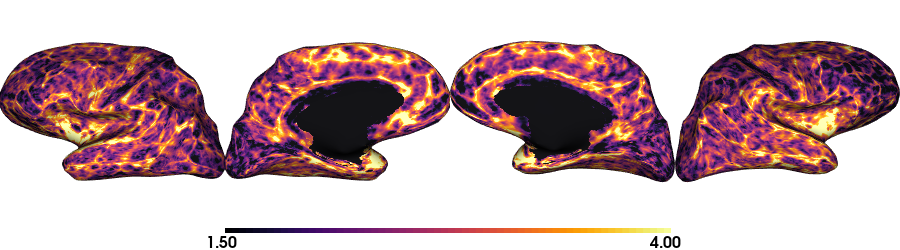

In [3]:
# Load the data
th_lh = dir_maps + subjectID + '_hemi-L_surf-fsnative_label-thickness.func.gii'
th_rh = dir_maps + subjectID + '_hemi-R_surf-fsnative_label-thickness.func.gii'
th_nat = np.hstack(np.concatenate((nib.load(th_lh).darrays[0].data,
                                   nib.load(th_rh).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=th_nat, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)


### Thickness: Inflated fsaverage5

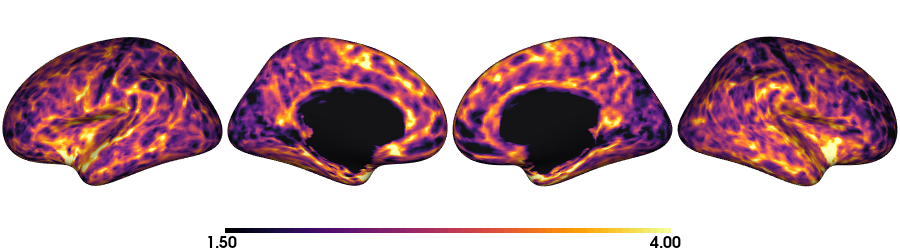

In [4]:
# Load the data
th_lh_fs5 = dir_maps + subjectID + '_hemi-L_surf-fsaverage5_label-thickness.func.gii'
th_rh_fs5 = dir_maps + subjectID + '_hemi-R_surf-fsaverage5_label-thickness.func.gii'
th_fs5 = np.hstack(np.concatenate((nib.load(th_lh_fs5).darrays[0].data,
                                   nib.load(th_rh_fs5).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=th_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)


### Thickness: fsLR-32k

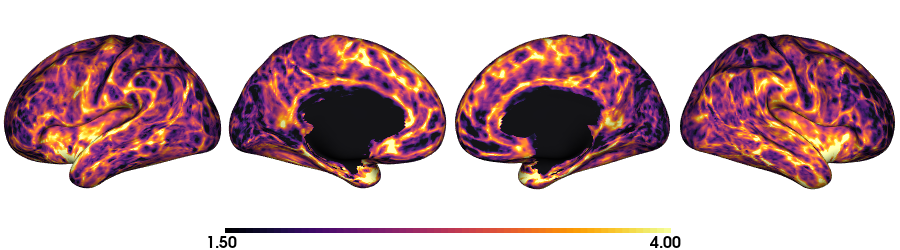

In [5]:
# Load the data
th_lh_fsLR32k = dir_maps + subjectID + '_hemi-L_surf-fsLR-32k_label-thickness.func.gii'
th_rh_fsLR32k = dir_maps + subjectID + '_hemi-R_surf-fsLR-32k_label-thickness.func.gii'
th_fsLR32k = np.hstack(np.concatenate((nib.load(th_lh_fsLR32k).darrays[0].data,
                                       nib.load(th_rh_fsLR32k).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(f32k_inf_lh, f32k_inf_rh, array_name=th_fsLR32k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)


### Thickness: fsLR-5k

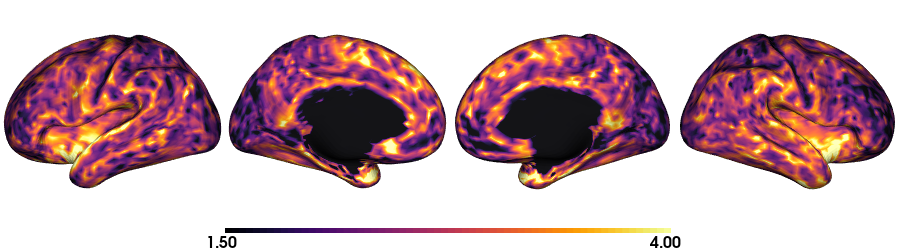

In [6]:
# Load the data
th_lh_fsLR5k = dir_maps + subjectID + '_hemi-L_surf-fsLR-5k_label-thickness.func.gii'
th_rh_fsLR5k = dir_maps + subjectID + '_hemi-R_surf-fsLR-5k_label-thickness.func.gii'
th_fsLR5k = np.hstack(np.concatenate((nib.load(th_lh_fsLR5k).darrays[0].data,
                                       nib.load(th_rh_fsLR5k).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(f5k_inf_lh, f5k_inf_rh, array_name=th_fsLR5k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="inferno", transparent_bg=False)


## Curvature
### Curvature: Inflated native surface

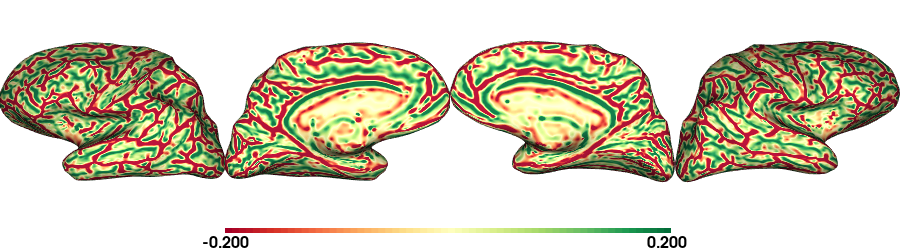

In [7]:
# Load the data
cv_lh = dir_maps + subjectID + '_hemi-L_surf-fsnative_label-curv.func.gii'
cv_rh = dir_maps + subjectID + '_hemi-R_surf-fsnative_label-curv.func.gii'
cv = np.hstack(np.concatenate((nib.load(cv_lh).darrays[0].data,
                               nib.load(cv_rh).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)


### Curvature: Inflated fsaverage5

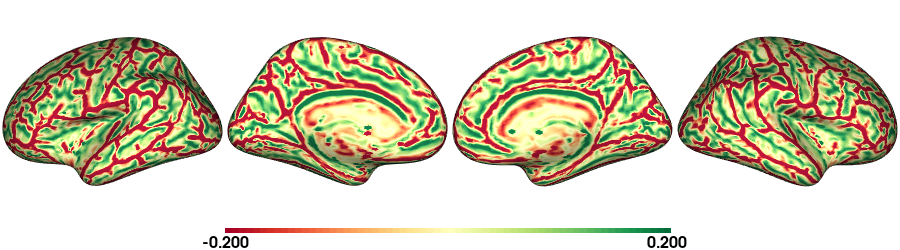

In [8]:
# Load the data
cv_lh_fs5 = dir_maps + subjectID + '_hemi-L_surf-fsaverage5_label-curv.func.gii'
cv_rh_fs5 = dir_maps + subjectID + '_hemi-R_surf-fsaverage5_label-curv.func.gii'
cv_fs5 = np.hstack(np.concatenate((nib.load(cv_lh_fs5).darrays[0].data,
                                   nib.load(cv_rh_fs5).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=cv_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)


### Curvature: fsLR-32k

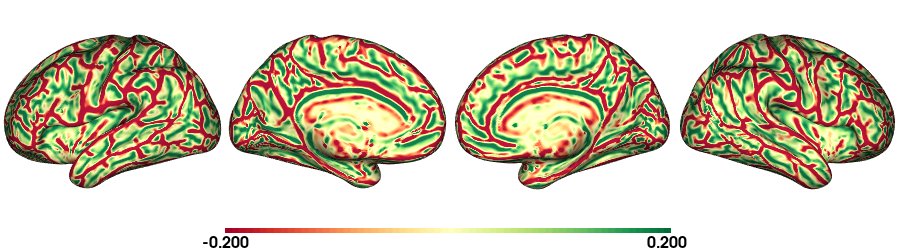

In [9]:
# Load the data
cv_lh_fsLR32k = dir_maps + subjectID + '_hemi-L_surf-fsLR-32k_label-curv.func.gii'
cv_rh_fsLR32k = dir_maps + subjectID + '_hemi-R_surf-fsLR-32k_label-curv.func.gii'
cv_fsLR32k = np.hstack(np.concatenate((nib.load(cv_lh_fsLR32k).darrays[0].data,
                                       nib.load(cv_rh_fsLR32k).darrays[0].data), axis=0))
# Plot the surface
plot_hemispheres(f32k_inf_lh, f32k_inf_rh, array_name=cv_fsLR32k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)


### Curvature: fsLR-5k

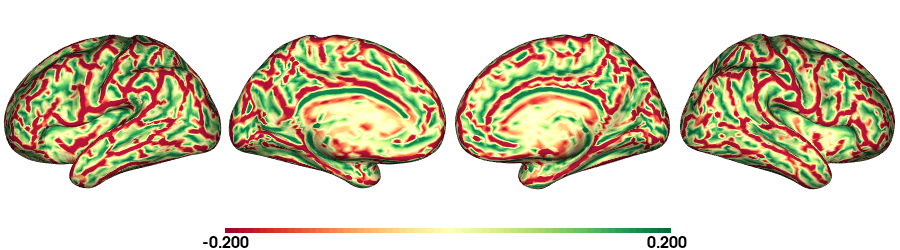

In [10]:
# Load the data
cv_lh_fsLR5k = dir_maps + subjectID + '_hemi-L_surf-fsLR-5k_label-curv.func.gii'
cv_rh_fsLR5k = dir_maps + subjectID + '_hemi-R_surf-fsLR-5k_label-curv.func.gii'
cv_fsLR5k = np.hstack(np.concatenate((nib.load(cv_lh_fsLR5k).darrays[0].data,
                                       nib.load(cv_rh_fsLR5k).darrays[0].data), axis=0))
# Plot the surface
plot_hemispheres(f5k_inf_lh, f5k_inf_rh, array_name=cv_fsLR5k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)


## fsLR-32k
### fsLR-32k: Native pial surface

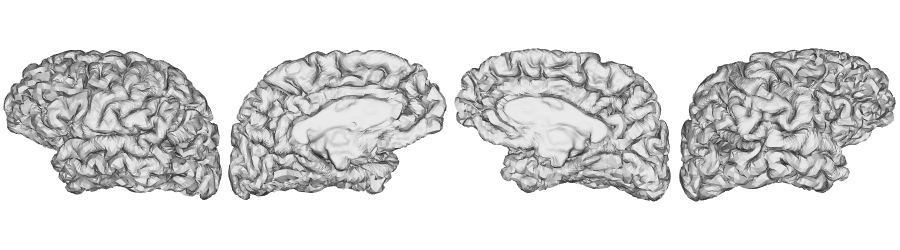

In [11]:
# Native conte69 pial surface
fsLR32k_pial_lh = read_surface(dir_surf+subjectID+'_hemi-L_space-nativepro_surf-fsLR-32k_label-pial.surf.gii', itype='gii')
fsLR32k_pial_rh = read_surface(dir_surf+subjectID+'_hemi-R_space-nativepro_surf-fsLR-32k_label-pial.surf.gii', itype='gii')

# Plot the surface
plot_hemispheres(fsLR32k_pial_lh, fsLR32k_pial_rh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap='Greys', transparent_bg=False)


### fsLR-32k: Native middle surface

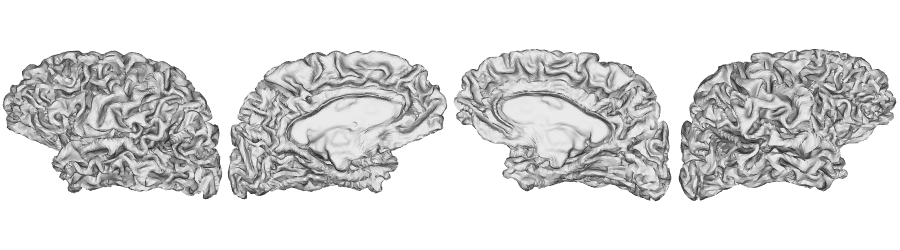

In [12]:
# Native fsLR-32k midsurface
fsLR32k_mid_lh = read_surface(dir_surf+subjectID+'_hemi-L_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii', itype='gii')
fsLR32k_mid_rh = read_surface(dir_surf+subjectID+'_hemi-R_space-nativepro_surf-fsLR-32k_label-midthickness.surf.gii', itype='gii')

# Plot the surface
plot_hemispheres(fsLR32k_mid_lh, fsLR32k_mid_rh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(-1,1), cmap='Greys', transparent_bg=False)


### fsLR-32k: Native white matter surface

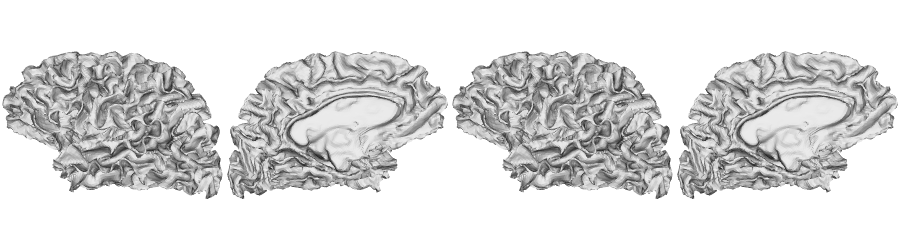

In [13]:
# Native fsLR-32k white matter
fsLR32k_wm_lh = read_surface(dir_surf+subjectID+'_hemi-L_space-nativepro_surf-fsLR-32k_label-white.surf.gii', itype='gii')
fsLR32k_wm_rh = read_surface(dir_surf+subjectID+'_hemi-R_space-nativepro_surf-fsLR-32k_label-white.surf.gii', itype='gii')

# Plot the surface
plot_hemispheres(fsLR32k_wm_lh, fsLR32k_wm_lh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap='Greys', transparent_bg=False)


# Native sphere

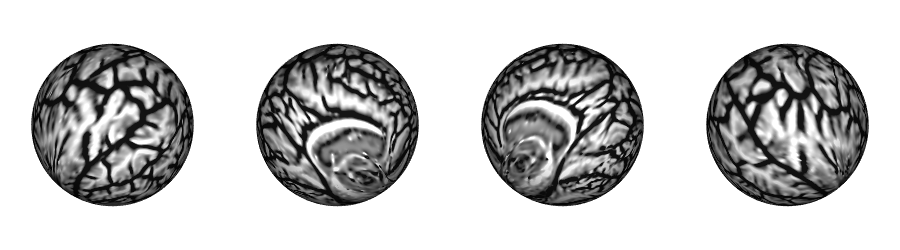

In [14]:
# Native sphere
sph_lh = read_surface(dir_surf+subjectID+'_hemi-L_surf-fsnative_label-sphere.surf.gii', itype='gii')
sph_rh = read_surface(dir_surf+subjectID+'_hemi-R_surf-fsnative_label-sphere.surf.gii', itype='gii')

# Plot the surface
plot_hemispheres(sph_lh, sph_rh, array_name=cv, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap="gray", transparent_bg=False)


# Superficial White Matter (SWM) in fsnative surface

In [15]:
# Function to load and plot each SWM surfaces
def plot_swm(mm='1'):
    # SWM fsnative 1mm
    swm_lh = read_surface(f'{dir_surf}{subjectID}_hemi-L_surf-fsnative_label-swm{mm}.0mm.surf.gii', itype='gii')
    swm_rh = read_surface(f'{dir_surf}{subjectID}_hemi-R_surf-fsnative_label-swm{mm}.0mm.surf.gii', itype='gii')
    
    # Plot the surface
    fig = plot_hemispheres(swm_lh, swm_rh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap='Greys', transparent_bg=False)
    return(fig)


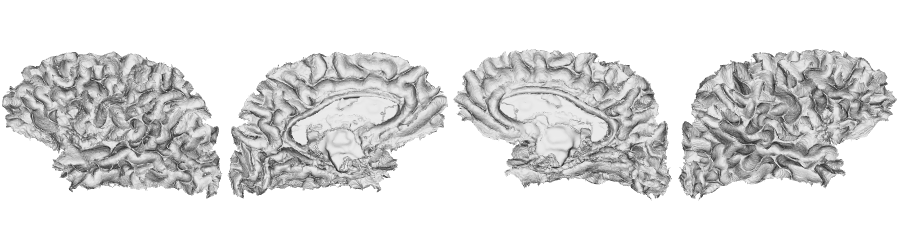

In [16]:
# SWM 1mm
plot_swm(mm='1')

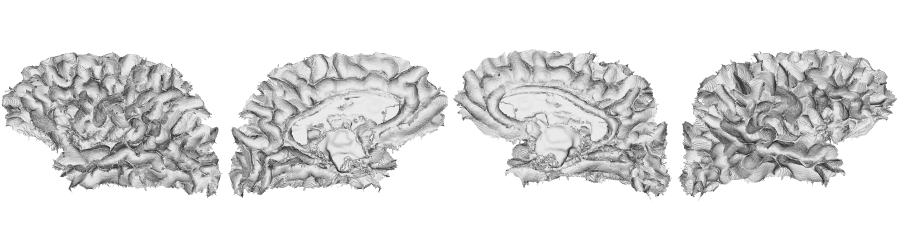

In [17]:
# SWM 1mm
plot_swm(mm='2')

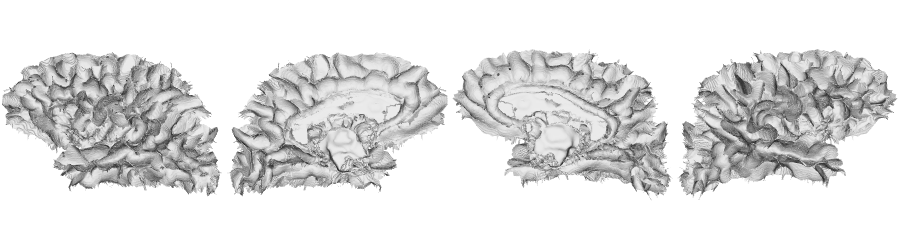

In [18]:
# SWM 1mm
plot_swm(mm='3')

# `/maps`: fsnative, fsaverage5, fsLR-32k and fsLR-5k

In [19]:
def load_qmri(qmri='', surf='fsLR-32k'):
    '''
    This function loads the qMRI intensity maps from midthickness surface 
    '''
    # List the files
    files_lh = sorted(glob.glob(f"{dir_maps}/*_hemi-L_surf-{surf}_label-midthickness_{qmri}.func.gii"))
    files_rh = sorted(glob.glob(f"{dir_maps}/*_hemi-R_surf-{surf}_label-midthickness_{qmri}.func.gii"))

    # Load map data
    surf_map=np.concatenate((nib.load(files_lh[0]).darrays[0].data, nib.load(files_rh[0]).darrays[0].data), axis=0)
        
    return(surf_map)

def plot_qmri(qmri='',  surf='fsLR-32k', label='pial', cmap='rocket', rq=(0.15, 0.95)):
    '''
    This function plots the qMRI intensity maps on the pial surface
    '''
    # Load the data
    map_surf = load_qmri(qmri, surf)
    print('Number of vertices: ' + str(map_surf.shape[0]))
    
    # Load the surfaces
    surf_lh=read_surface(f'{dir_surf}/{subjectID}_hemi-L_space-nativepro_surf-{surf}_label-{label}.surf.gii', itype='gii')
    surf_rh=read_surface(f'{dir_surf}/{subjectID}_hemi-R_space-nativepro_surf-{surf}_label-{label}.surf.gii', itype='gii')
    
    # Color range based in the quantiles
    crange=(np.quantile(map_surf, rq[0]), np.quantile(map_surf, rq[1]))
    
    # Plot the group T1map intensitites
    fig = plot_hemispheres(surf_lh, surf_rh, array_name=map_surf, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), cmap=cmap, color_range=crange, transparent_bg=False, screenshot = False)
    return(fig)

Number of vertices: 405864


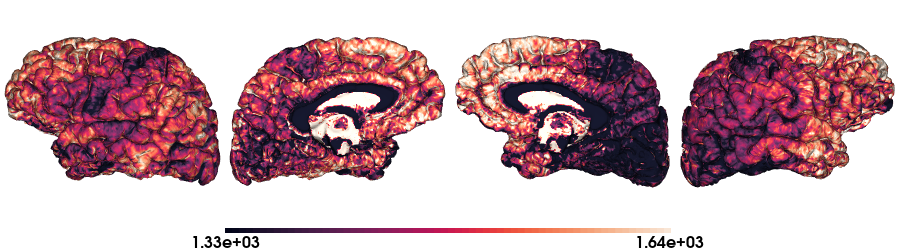

In [20]:
# T1map on fsnative
plot_qmri('T1map', 'fsnative')

Number of vertices: 20484


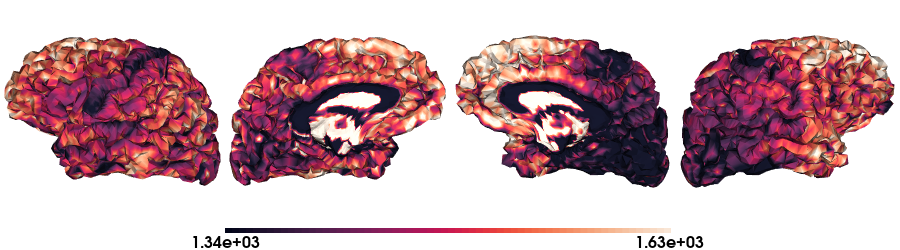

In [21]:
# T1map on fsaverage5
plot_qmri('T1map', 'fsaverage5')

Number of vertices: 64984


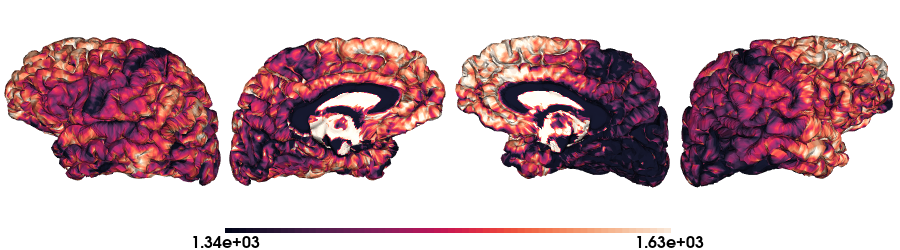

In [22]:
# T1map on fsLR-32k
plot_qmri('T1map', 'fsLR-32k')

Number of vertices: 9684


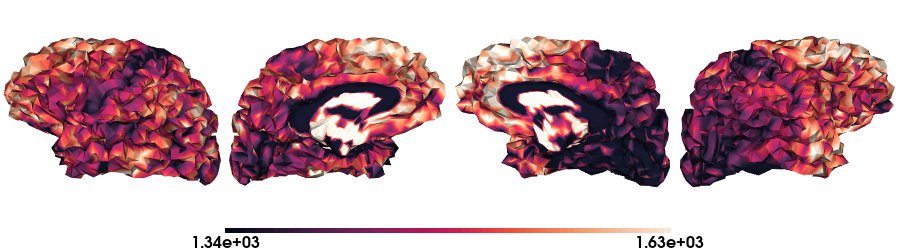

In [23]:
# T1map on fsLR-5k
plot_qmri('T1map', 'fsLR-5k')

# Parcellations
## Schaefer-400 labels

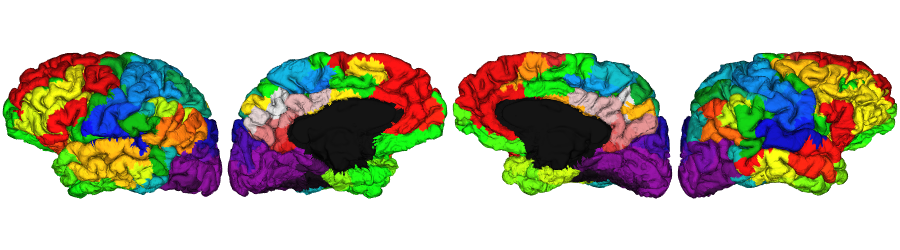

In [24]:
# Load annotation file
annot = 'schaefer-400'
annot_lh= dir_FS + '/label/lh.' + annot + '_mics.annot'
annot_rh= dir_FS + '/label/rh.' + annot + '_mics.annot'
label = np.concatenate((nib.freesurfer.read_annot(annot_lh)[0], nib.freesurfer.read_annot(annot_rh)[0]), axis=0)

# plot labels on surface
plot_hemispheres(pial_lh, pial_rh, array_name=label, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), cmap='nipy_spectral', transparent_bg=False)


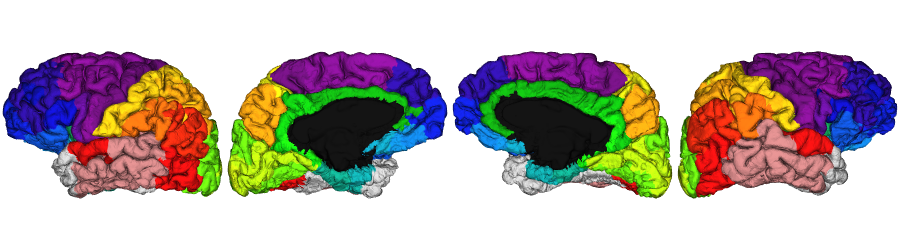

In [25]:
# Load annotation file
annot = 'economo'
annot_lh= dir_FS + '/label/lh.' + annot + '_mics.annot'
annot_rh= dir_FS + '/label/rh.' + annot + '_mics.annot'
label = np.concatenate((nib.freesurfer.read_annot(annot_lh)[0], nib.freesurfer.read_annot(annot_rh)[0]), axis=0)

# plot labels on surface
plot_hemispheres(pial_lh, pial_rh, array_name=label, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), cmap='nipy_spectral', transparent_bg=False)
